# Bonus Lab: Classification Evaluation Metrics

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **4BSc DS A** <br>

---------------

### `Objective`:  
Create user defined functions for creating the following for a binary classification problem, when y_pred and y_test is given.

- Confusion Matrix
- Accuracy Score
- Precision
- Recall
- F1 Score
- Plotting points on a AUC Curve

### `Probelm Definition`:  
Create user defined functions for creating the following for a binary classification problem, when y_pred and y_test is given.

- Confusion Matrix
- Accuracy Score
- Precision
- Recall
- F1 Score
- Plotting points on a AUC Curve

### `References`:  
1. StackOverflow  
2. GeekfroGeeks
3. W3School  
4. TutorialPoints

### `Code`:

In [1]:
# importing all the necessary libraries / modules
import pandas as pd
import numpy as np
import pickle
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the breast cancer dataset dataset onto python
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = [cancer.feature_names]) # converting array into dataframes
df['Target'] = cancer.target # adding the target variable to the dataframe

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Machine Learning

In [4]:
# Defining X and y
X = df[cancer.feature_names]
y = df['Target']

In [5]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 69)

In [6]:
# Training a model to generate predicted values
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

### Confusion Metrics and it's evaluation Metrics

In [7]:
def confustionMatrix(y_test, y_pred, kind = None):  
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for i, j in zip(y_test.values.tolist(), y_pred): 
        if i == j: # (1, 1) or (0, 0)
            if j == 1:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if j == 1: # (1, 0) or (0, 1)
                false_positive += 1
            else:
                false_negative += 1

    # Creating a matrix of all the combinations
    confusion_matrix = np.matrix([[true_negative, false_positive], [false_negative, true_positive]])
    
    # Plotting the above matrix
    if kind.lower() == "confusion matrix":
        s = sns.heatmap(confusion_matrix, annot = True)
        s.set_xlabel('Predicted Label', fontsize=10)
        s.set_ylabel('Actual Label', fontsize=10)
        
    elif kind.lower() == "accuracy score":
        accuracy_score = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
        return accuracy_score
    
    elif kind.lower() == "precision":
        precision = true_positive/(true_positive + false_positive)
        return precision
        
    elif kind.lower() == "recall":
        recall = true_positive/(true_positive + false_negative)
        return recall
        
    elif kind.lower() == "f1 score":
        precision = true_positive/(true_positive + false_positive)
        recall = true_positive/(true_positive + false_negative)
        f1 =  2/((1/recall) + (1/precision)) #harmonic mean
        return f1
    
    elif kind.lower() == "roc":
        tpr = true_positive/(true_positive + false_negative)
        fpr = false_positive/(false_positive + true_negative)
        
        p = plt.plot(tpr, fpr)

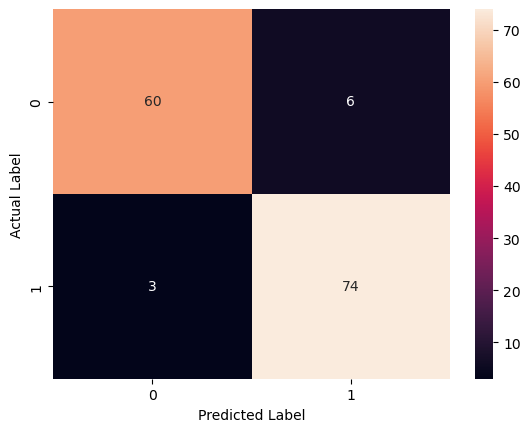

In [8]:
confustionMatrix(y_test, y_pred, kind = "Confusion Matrix")

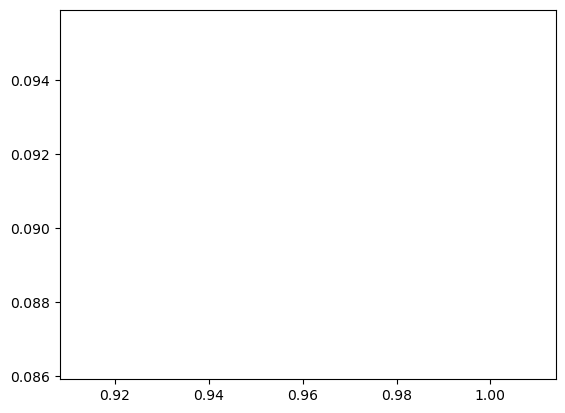

In [9]:
# revision on AUC-ROC curve is much needed :(
confustionMatrix(y_test, y_pred, kind = "roc")

In [10]:
print(" Accuracy Score:", confustionMatrix(y_test, y_pred, kind = "Accuracy score"))

 Accuracy Score: 0.9370629370629371


In [11]:
print(" Accuracy Score:", confustionMatrix(y_test, y_pred, kind = "recalL"))

 Accuracy Score: 0.961038961038961


In [12]:
print(" Accuracy Score:", confustionMatrix(y_test, y_pred, kind = "precision"))

 Accuracy Score: 0.925


In [13]:
print(" Accuracy Score:", confustionMatrix(y_test, y_pred, kind = "f1 score"))

 Accuracy Score: 0.9426751592356688


### Playground

#### Accuracy

In [14]:
def confustionMatrixAccuracy(y_test, y_pred):  
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for i, j in zip(y_test.values.tolist(), y_pred):
        if i == j: # (1, 1) or (0, 0)
            if j == 1:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if j == 1: # (1, 0) or (0, 1)
                false_positive += 1
            else:
                false_negative += 1

    # Creating a matrix of all the combinations
    confusion_matrix = [[true_negative, false_positive], [false_negative, true_positive]]
    
    num = 0
    denom = 0

    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix)):
            if i == j:
                 num += confusion_matrix[i][j]
            else: 
                denom += confusion_matrix[i][j]

    accuracy = num/(num+denom)
    
    return accuracy

In [15]:
confustionMatrixAccuracy(y_test, y_pred) == confustionMatrix(y_test, y_pred, kind = "AccuRacy ScORe")

True

#### Precision  
precision = true_positive/(true_positive + false_positive)

In [16]:
def confustionMatrixPrecision(y_test, y_pred):  
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for i, j in zip(y_test.values.tolist(), y_pred):
        if i == j: # (1, 1) or (0, 0)
            if j == 1:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if j == 1: # (1, 0) or (0, 1)
                false_positive += 1
            else:
                false_negative += 1

    # Creating a matrix of all the combinations
    confusion_matrix = [[true_negative, false_positive], [false_negative, true_positive]]
    
    return confusion_matrix

In [17]:
hi = confustionMatrixPrecision(y_test, y_pred)
hi

[[60, 6], [3, 74]]

In [18]:
hi[-1][-1]

74

In [19]:
num = 0
denom = 0

for i in range(len(hi)):
    for j in range(len(hi)):
        if j == 1:
            num += hi[i][i]
        if (i, j == 1, 1):
            denom += hi[i][j]
            
precision = num/denom

In [20]:
precision

0.9370629370629371

#### Recall

In [21]:
confustionMatrix(y_test, y_pred, kind = "recall")

0.961038961038961

In [22]:
confustionMatrix(y_test, y_pred, kind = "precision")

0.925

In [23]:
confustionMatrix(y_test, y_pred, kind = "f1 score")

0.9426751592356688